In [13]:
users = [
    { "id": 0, "name": "Hero" },
    { "id": 1, "name": "Dunn" },
    { "id": 2, "name": "Sue" },
    { "id": 3, "name": "Chi" },
    { "id": 4, "name": "Thor" },
    { "id": 5, "name": "Clive" },
    { "id": 6, "name": "Hicks" },
    { "id": 7, "name": "Devin" },
    { "id": 8, "name": "Kate" },
    { "id": 9, "name": "Klein" },
    { "id": 10, "name": "Jen" }
]

In [14]:
friendships = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
               (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

In [15]:
for user in users:
    user["friends"] =  []

In [16]:
for i,j in friendships:
    users[i]["friends"].append(users[j])
    users[j]["friends"].append(users[i])

In [17]:
def number_of_friends(user):
    return len(user["friends"])
total_connection = sum(number_of_friends(user) for user in users)

In [18]:
total_connection

24

In [19]:
from __future__ import division
num_users = len(users)
avg_connections = total_connection / num_users

In [20]:
num_friends_by_id = [(user["id"],number_of_friends(user)) for user in users]

In [26]:
sorted(num_friends_by_id,
                 key=lambda pair: pair[1],                       # by number of friends
                 reverse=True)

[(1, 3),
 (2, 3),
 (3, 3),
 (5, 3),
 (8, 3),
 (0, 2),
 (4, 2),
 (6, 2),
 (7, 2),
 (9, 1),
 (10, 0)]

In [32]:
def friends_of_friend_ids_bad(user):
    return [foaf["id"]
               for friend in user["friends"]
               for foaf in friend["friends"]]

In [33]:
friends_of_friend_ids_bad(users[0])

[0, 2, 3, 0, 1, 3]

In [40]:
print ([friend["id"] for friend in users[0]["friends"]])
print ([friend["id"] for friend in users[1]["friends"]])
print ([friend["id"] for friend in users[2]["friends"]])

[1, 2]
[0, 2, 3]
[0, 1, 3]


In [41]:
from collections import Counter

In [46]:
def not_the_same(user, other_user):
    return user["id"] != other_user["id"]

def not_friends(user, other_user):
    return all(not_the_same(friend, other_user)
                  for friend in user["friends"])

def friends_of_friend_ids(user):
    return Counter(foaf["id"]
                          for friend in user["friends"]
                          for foaf in friend["friends"]
                          if not_the_same(user, foaf)
                          and not_friends(user, foaf))

In [47]:
print(friends_of_friend_ids(users[3]))

Counter({0: 2, 5: 1})


In [48]:
interests = [
    (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
    (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
    (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
    (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
    (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
    (3, "statistics"), (3, "regression"), (3, "probability"),
    (4, "machine learning"), (4, "regression"), (4, "decision trees"),
    (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
    (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
    (6, "probability"), (6, "mathematics"), (6, "theory"),
    (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
    (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
    (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
    (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]


In [49]:
def data_scientist_who_like(taget_interest):
    return [user_id
               for user_id, user_interest in interests
               if user_interest == target_interest]

In [50]:
from collections import defaultdict

In [51]:
user_ids_by_interest = defaultdict(list)

for user_id, interest in interests:
    user_ids_by_interest[interest].append(user_id)

In [52]:
interests_by_user_id = defaultdict(list)

for user_id, interest in interests:
    interests_by_user_id[user_id].append(interest)

In [55]:
def most_common_interests_with(user_id):
    return Counter(interested_user_id
                  for interst in interests_by_user_id[user_id]
                  for intersed_user_id in user_ids_by_interest[interst]
                  if interested_user_id != user["id"])

In [56]:

salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
                        (48000, 0.7), (76000, 6),
                        (69000, 6.5), (76000, 7.5),
                        (60000, 2.5), (83000, 10),
                        (48000, 1.9), (63000, 4.2)]

In [59]:
from matplotlib import pyplot as plt

def make_chart_salaries_by_tenure():
    tenures = [tenure for salary, tenure in salaries_and_tenures]
    salaries = [salary for salary, tenure in salaries_and_tenures]
    plt.scatter(tenures, salaries)
    plt.xlabel("Years Experience")
    plt.ylabel("Salary")
    plt.show()

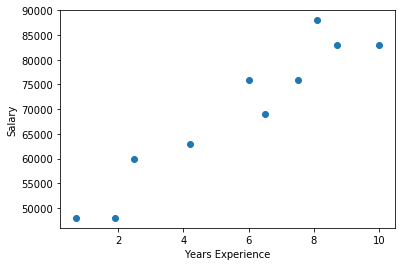

In [60]:
make_chart_salaries_by_tenure()

In [63]:
salary_by_tenure = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    salary_by_tenure[tenure].append(salary)
    
average_salary_by_tenure = {
    tenure : sum(salaries) / len (salaries)
    for tenure, salaries in salary_by_tenure.items()
}

In [64]:
average_salary_by_tenure

{0.7: 48000.0,
 1.9: 48000.0,
 2.5: 60000.0,
 4.2: 63000.0,
 6: 76000.0,
 6.5: 69000.0,
 7.5: 76000.0,
 8.1: 88000.0,
 8.7: 83000.0,
 10: 83000.0}

In [65]:
def tenure_buckt(tenure):
    if tenure < 2:
        return "less than two"
    elif tenure < 5:
        return "between two and five"
    else:
        return "more than five"
    

In [66]:
salary_by_tenure_bucket = defaultdict(list)
for salary, tenure in salaries_and_tenures:
    bucket = tenure_buckt(tenure)
    salary_by_tenure_bucket[bucket].append(salary)

In [69]:
average_salary_by_bucket = {
    tenure_bucket  : sum(salaries)/len(salaries)
    for tenure_bucket, salaries in salary_by_tenure_bucket.items()
}

In [70]:
average_salary_by_bucket

{'between two and five': 61500.0,
 'less than two': 48000.0,
 'more than five': 79166.66666666667}

In [71]:
def predict_paid_or_unpaid(years_experience):
    if years_experience < 3.0: return "paid"
    elif years_experience < 8.5: return "unpaid"
    else: return "paid"

In [72]:
words_and_counts = Counter(word
                                          for user, interest in interests
                                          for word in interest.lower().split())

In [73]:
for word, count in words_and_counts.most_common():
    if count > 1:
        print(word, count)

big 3
data 3
java 3
python 3
learning 3
hadoop 2
hbase 2
cassandra 2
scikit-learn 2
r 2
statistics 2
regression 2
probability 2
machine 2
neural 2
networks 2
